# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys 
sys.path.append('..')
import os
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#save config
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


name = []
number = []
lat = []
lon = []
maxt = []
hum = []
clds = []
ws = []
country = []
date = []

#loop through city and request data on each one
index = 0
group = 1
for city in cities[:550]:
    #rate limit on api calls
    index +=1
    if index ==51:
        index = 0
        group += 1
        time.sleep(60)
    #http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID==Atlanta
    #base_url -------------------------------------------------------------------------------------------
    city_url = f"{base_url}&q={city.replace(' ', '+')}"
    response = requests.get(city_url).json()
#append results to list placeholders
    try:
        number.append(response['id'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxt.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        clds.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        print(f"Processing Record {index} of set {group} for {city}, with city number {response['id']}")

    #alert when city is not found
    except KeyError:
        print("City not found.  Moving on...")
        pass

print('Data Processing Complete')

Processing Record 1 of set 1 for casablanca, with city number 2553604
Processing Record 2 of set 1 for olovyannaya, with city number 2018498
Processing Record 3 of set 1 for lavrentiya, with city number 4031637
Processing Record 4 of set 1 for ubinskoye, with city number 1488708
Processing Record 5 of set 1 for new norfolk, with city number 2155415
Processing Record 6 of set 1 for arraial do cabo, with city number 3471451
Processing Record 7 of set 1 for mookane, with city number 933290
Processing Record 8 of set 1 for barrow, with city number 5880054
Processing Record 9 of set 1 for batemans bay, with city number 2176639
Processing Record 10 of set 1 for alhadas, with city number 2743076
Processing Record 11 of set 1 for alice springs, with city number 2077895
City not found.  Moving on...
City not found.  Moving on...
Processing Record 14 of set 1 for busselton, with city number 2075265
Processing Record 15 of set 1 for college, with city number 5859699
Processing Record 16 of set 1 

Processing Record 25 of set 3 for treinta y tres, with city number 3439781
Processing Record 26 of set 3 for luderitz, with city number 3355672
Processing Record 27 of set 3 for richards bay, with city number 962367
Processing Record 28 of set 3 for kathmandu, with city number 1283240
Processing Record 29 of set 3 for bengkulu, with city number 1649150
Processing Record 30 of set 3 for torbay, with city number 6167817
Processing Record 31 of set 3 for ilulissat, with city number 3423146
Processing Record 32 of set 3 for georgetown, with city number 1735106
Processing Record 33 of set 3 for zhanaozen, with city number 607610
Processing Record 34 of set 3 for avera, with city number 4231997
Processing Record 35 of set 3 for providencia, with city number 3991622
Processing Record 36 of set 3 for morogoro, with city number 153220
Processing Record 37 of set 3 for natitingou, with city number 2392601
Processing Record 38 of set 3 for malanje, with city number 2239862
City not found.  Moving

Processing Record 47 of set 5 for deputatskiy, with city number 2028164
Processing Record 48 of set 5 for eureka, with city number 5563397
Processing Record 49 of set 5 for pevek, with city number 2122090
City not found.  Moving on...
Processing Record 0 of set 6 for codajas, with city number 3664525
Processing Record 1 of set 6 for ahlat, with city number 325103
City not found.  Moving on...
Processing Record 3 of set 6 for yumen, with city number 1528998
Processing Record 4 of set 6 for barra, with city number 3470821
Processing Record 5 of set 6 for vieira de leiria, with city number 2261673
Processing Record 6 of set 6 for lorengau, with city number 2092164
Processing Record 7 of set 6 for hofn, with city number 2630299
Processing Record 8 of set 6 for arcachon, with city number 6621469
Processing Record 9 of set 6 for campoverde, with city number 3733380
Processing Record 10 of set 6 for dudinka, with city number 1507116
Processing Record 11 of set 6 for pemberton, with city numbe

Processing Record 21 of set 8 for havoysund, with city number 779622
Processing Record 22 of set 8 for formosa, with city number 3433899
City not found.  Moving on...
Processing Record 24 of set 8 for walvis bay, with city number 3359638
Processing Record 25 of set 8 for la macarena, with city number 3827693
Processing Record 26 of set 8 for rabo de peixe, with city number 3372745
Processing Record 27 of set 8 for geraldton, with city number 2070998
Processing Record 28 of set 8 for puerto cabezas, with city number 3617154
City not found.  Moving on...
Processing Record 30 of set 8 for kalmar, with city number 2702261
Processing Record 31 of set 8 for shahdol, with city number 1256739
Processing Record 32 of set 8 for belvedere marittimo, with city number 2525567
Processing Record 33 of set 8 for garissa, with city number 197745
Processing Record 34 of set 8 for isola della scala, with city number 3175428
Processing Record 35 of set 8 for qasigiannguit, with city number 3420768
Process

Processing Record 45 of set 10 for zhigansk, with city number 2012530
Processing Record 46 of set 10 for wageningen, with city number 2745087
Processing Record 47 of set 10 for vardo, with city number 777019
Processing Record 48 of set 10 for payson, with city number 5779548
Processing Record 49 of set 10 for girvan, with city number 2648626
Processing Record 50 of set 10 for talcahuano, with city number 3870282
Processing Record 0 of set 11 for tanabi, with city number 3446979
Processing Record 1 of set 11 for broome, with city number 5110365
Processing Record 2 of set 11 for sept-iles, with city number 6144312
Processing Record 3 of set 11 for coahuayana, with city number 4013679
Processing Record 4 of set 11 for ocampo, with city number 3994535
Processing Record 5 of set 11 for vestmanna, with city number 2610343
Processing Record 6 of set 11 for gigmoto, with city number 1712961
Processing Record 7 of set 11 for tara, with city number 1490140
Processing Record 8 of set 11 for chara

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dataframe out of above results

weather_dictionary = {
    "City": name,
    "Lat": lat,
    "Lon": lon,
    "Max Temp": maxt,
    "Humidity": hum,
    "Cloudiness": clds,
    "Wind Speed": ws,
    "Country": country,
    "Date": date
}

weat_data = pd.DataFrame(weather_dictionary)
weat_data

City      Lat       Lon  Max Temp  Humidity  Cloudiness  \
0     Casablanca  33.5928   -7.6192     61.02        63          21   
1    Olovyannaya  50.9500  115.5667     39.40        46         100   
2     Lavrentiya  65.5833 -171.0000     29.07        74           3   
3      Ubinskoye  55.3068   79.6802     36.48        63         100   
4    New Norfolk -42.7826  147.0587     56.70        76          97   
..           ...      ...       ...       ...       ...         ...   
498      Chekhov  55.1431   37.4711     44.85        95          89   
499    Peterhead  57.5058   -1.7981     43.66        78          79   
500      Sinaloa  25.0000 -107.5000     90.10        33           0   
501       Ulundi -28.3352   31.4162     54.63        95           1   
502        Guane  22.2025  -84.0875     83.25        49          17   

     Wind Speed Country        Date  
0         11.01      MA  1650406879  
1         16.55      RU  1650406879  
2          6.15      RU  1650406880  
3          6.80      RU  1650406880  
4          3.11      AU  1650406881  
..          ...     ...         ...  
498       10.96      RU  1650407635  
499        7.27      GB  1650407635  
500        5.99      MX  1650407385  
501        3.65      ZA  1650407635  
502       12.95      CU  1650407636  

[503 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

humid_check = weat_data.describe()

if humid_check.iloc[7, 3] > 100:
    clean_data = weat_data.drop(weat_data[weat_data['Humidity'] > 100].index, inplace=False)
else:
    clean_data = weat_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

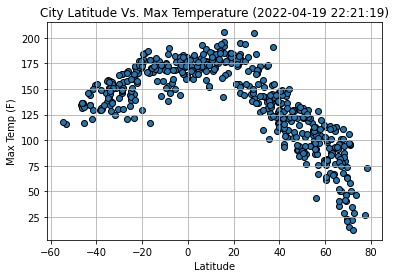

In [6]:
x_axis = clean_data['Lat']
y_axis = clean_data['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit='s')

plt.scatter(x_axis, y_axis, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'City Latitude Vs. Max Temperature ({date[0]})')
plt.grid()
plt.savefig("fig1.png")
plt.show()

In [7]:
##  This chart is analyzing the Max temperature of a city versus it's latitude.  This graph shows that the max temps drop significantly in the northern hemisphere compared to the southern hemisphere.

## Latitude vs. Humidity Plot

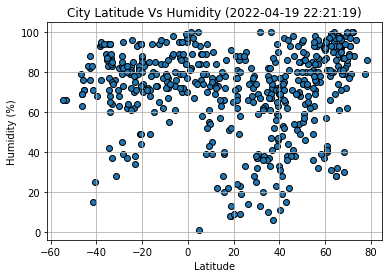

In [8]:
x_axis = clean_data['Lat']
y_axis = clean_data['Humidity']
date = pd.to_datetime(clean_data['Date'], unit='s')

plt.scatter(x_axis, y_axis, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude Vs Humidity ({date[0]})')
plt.grid()
plt.savefig("fig2.png")
plt.show()

In [9]:
##  This chart is analyzing the humidity of a city versus it's latitude. The results of this chart show that (of the cities recorded) the humidity is higher in the northern hemisphere.

## Latitude vs. Cloudiness Plot

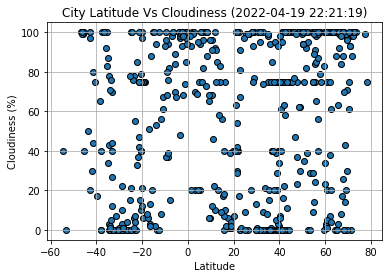

In [10]:
x_axis = clean_data['Lat']
y_axis = clean_data['Cloudiness']
date = pd.to_datetime(clean_data['Date'], unit='s')

plt.scatter(x_axis, y_axis, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude Vs Cloudiness ({date[0]})')
plt.grid()
plt.savefig("fig3.png")
plt.show()

In [11]:
##  This chart is analyzing the cloudiness of a city verus it's latitude.  The resluts show that the cloudiness is fairly evenly distributed with maybe a little more cloudiness in the northern hemisphere.  

## Latitude vs. Wind Speed Plot

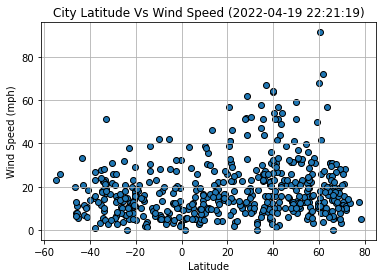

In [12]:
x_axis = clean_data['Lat']
y_axis = clean_data['Wind Speed'] * 2.23694
date = pd.to_datetime(clean_data['Date'], unit='s')

plt.scatter(x_axis, y_axis, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude Vs Wind Speed ({date[0]})')
plt.grid()
plt.savefig("fig4.png")
plt.show()

In [13]:
## This chart is analyizng the wind speed in each city versus the lattitude.  The wind speed remains very similar across both hemispheres, with only a few outliers.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      139.551295
1      107.332362
2       80.169611
3       99.245145
7       69.575557
          ...    
495    115.619310
498     99.549010
499     95.163298
500    155.501496
502    160.694296
Name: Lat, Length: 339, dtype: float64
y = x +201.91
The r-value is : 0.7913786519053335


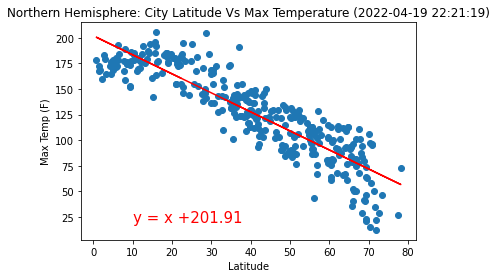

In [14]:
northern_hemisphere = clean_data.drop(clean_data[clean_data['Lat'] < 0].index, inplace=False)

x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is : {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f"Northern Hemisphere: City Latitude Vs Max Temperature ({date[0]})")
plt.annotate(line_eq,(10,20), fontsize=15, color="red")
plt.show()

In [15]:
## This linear regression shows that there is a neative correlation bewtween the max temperature and the lattitude as you head towards the top of the globe.  The temperature drops as you move farther from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

4      138.678201
5      156.770833
6      156.111732
8      145.129427
10     156.100776
          ...    
480    169.425130
493    161.567414
496    147.676264
497    146.648673
501    151.868799
Name: Lat, Length: 164, dtype: float64
y = x +177.74
The r-value is: 0.45423835206104474


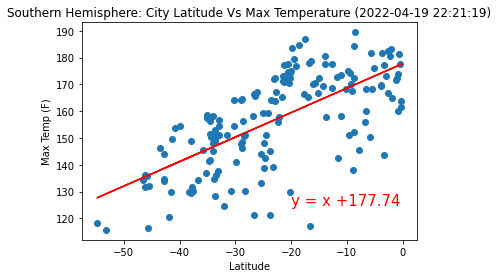

In [16]:
southern_hemisphere = clean_data.drop(clean_data[clean_data['Lat'] >= 0].index, inplace=False)

x_axis = southern_hemisphere['Lat']
y_axis = southern_hemisphere['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f"Southern Hemisphere: City Latitude Vs Max Temperature ({date[0]})")
plt.annotate(line_eq,(-20,125), fontsize=15,color="red")
plt.show()

In [17]:
## This linear regression shows a positive correlation.  As we move closer to the equator, the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      66.023604
1      71.118223
2      75.413334
3      72.397015
7      77.088519
         ...    
495    69.807850
498    72.348966
499    73.042457
500    63.501478
502    62.680366
Name: Lat, Length: 339, dtype: float64
y = x +56.16
The r-value is: 0.06372082558552716


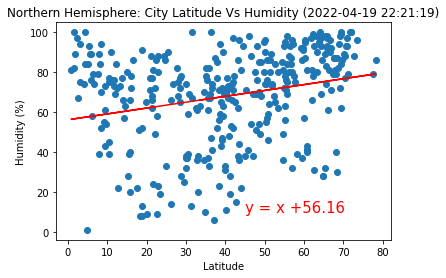

In [18]:
x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Humidity']

date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere: City Latitude Vs Humidity ({date[0]})")
plt.annotate(line_eq,(45,10), fontsize=15, color="red")
plt.show()

In [19]:
## There is not enough data to show a strong correlation for this regression model.  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

4      71.596460
5      76.011108
6      75.850285
8      73.170576
10     75.847612
         ...    
480    79.098788
493    77.181485
496    73.792010
497    73.541275
501    74.814999
Name: Lat, Length: 164, dtype: float64
y = x +81.13
The r-value is: 0.03611808123857246


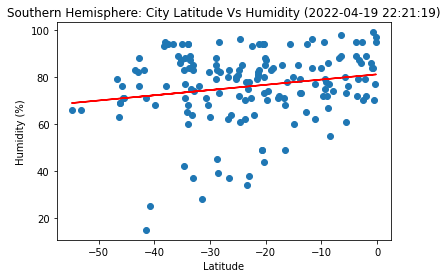

In [20]:
x_axis = southern_hemisphere['Lat']
y_axis = southern_hemisphere['Humidity']

date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere: City Latitude Vs Humidity ({date[0]})")
plt.annotate(line_eq,(45,10), fontsize=15, color="red")
plt.show()

In [21]:
## There is not enough data to show a strong correlation for this regression model.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      57.488600
1      62.004629
2      65.811948
3      63.138189
7      67.296884
         ...    
495    60.843073
498    63.095597
499    63.710329
500    55.252910
502    54.525051
Name: Lat, Length: 339, dtype: float64
y = x +48.75
The r-value is: 0.017483732519910665


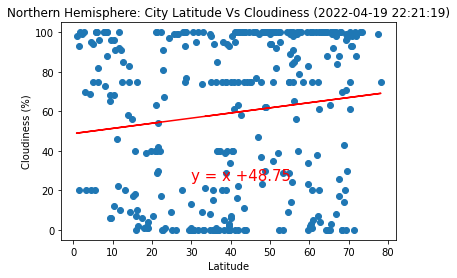

In [22]:
x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Cloudiness']

date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Northern Hemisphere: City Latitude Vs Cloudiness ({date[0]})")
plt.annotate(line_eq,(30,25), fontsize=15, color="red")
plt.show()

In [23]:
## There is not enough data to show a strong correlation for this regression model.  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

4      31.888781
5      49.900201
6      49.244059
8      38.311050
10     49.233152
         ...    
480    62.497698
493    54.675252
496    40.846455
497    39.823476
501    45.020171
Name: Lat, Length: 164, dtype: float64
y = x +70.77
The r-value is: 0.09125761924283969


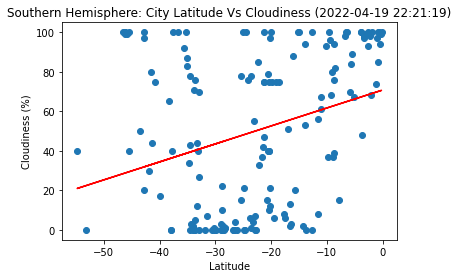

In [24]:
x_axis = southern_hemisphere['Lat']
y_axis = southern_hemisphere['Cloudiness']

date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere: City Latitude Vs Cloudiness ({date[0]})")
plt.annotate(line_eq,(30,25), fontsize=15, color="red")
plt.show()

In [25]:
## There is not enough data to show a strong correlation for this regression model.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      8.979520
1      9.235492
2      9.451293
3      9.299743
7      9.535461
         ...   
495    9.169654
498    9.297329
499    9.332172
500    8.852799
502    8.811543
Name: Lat, Length: 339, dtype: float64
y = x +8.48
The r-value is: 0.0021319043077117784


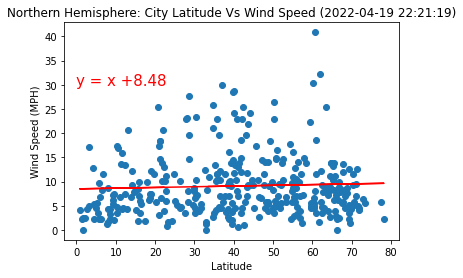

In [26]:
x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Wind Speed']

date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"Northern Hemisphere: City Latitude Vs Wind Speed ({date[0]})")
plt.annotate(line_eq,(0,30), fontsize=15, color="red")
plt.show()

In [27]:
## There is not enough data to show a strong correlation for this regression model.  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

4      7.025801
5      6.567735
6      6.584422
8      6.862470
10     6.584700
         ...   
480    6.247356
493    6.446296
496    6.797990
497    6.824006
501    6.691844
Name: Lat, Length: 164, dtype: float64
y = x +6.04
The r-value is: 0.005346377149239452


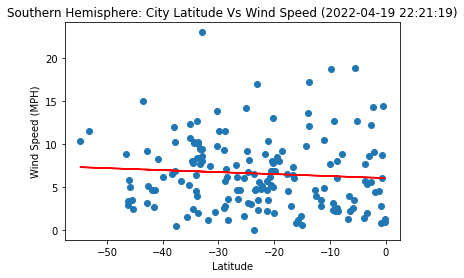

In [28]:
x_axis = southern_hemisphere['Lat']
y_axis = southern_hemisphere['Wind Speed']

date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is: {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"Southern Hemisphere: City Latitude Vs Wind Speed ({date[0]})")
plt.annotate(line_eq,(50,30), fontsize=15, color="red")
plt.show()

In [29]:
## There is not enough data to show a strong correlation for this regression model.  

In [30]:
## DATA ANALYSIS:

#1) For the most part, the data was far to varied to be able to determine a correlation between many of the variables.  

#2) Temperature was the only thing that was able to determine a correlation, which was rather obvious, but it also shows that temperature more strongly relates to latitude in the northen hemisphere.

#3) You will see a much sharper drop once you leave the surrounding area of the equator.  The strongest concentration of max temperatures was right next to the equator and then you see a steady decline moving both north and south.

In [31]:
clean_data.to_csv("../../output_data/cities.csv")